# A Base R Look at the NYC Air Quality Dataset

Well, running R notebooks without a server is a thing now, I guess. As of right now, we don't have many packages available to us, but we can still work with data.frames and make basic models.

In [ ]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               


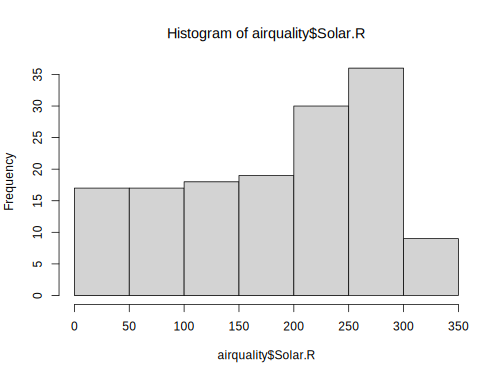

In [ ]:
hist(airquality$Solar.R)

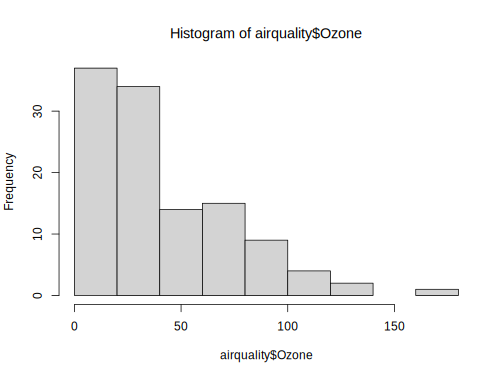

In [ ]:
hist(airquality$Ozone)

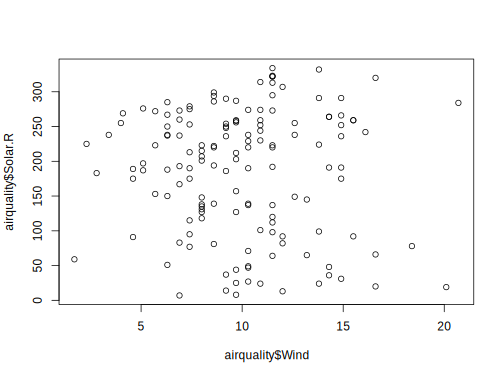

In [ ]:
plot(airquality$Wind, airquality$Solar.R)

While I'll admit that base R graphics can look a bit dated, various Base R modeling functions remain as useful as ever. Let's try some linear regressions on the airquality data:

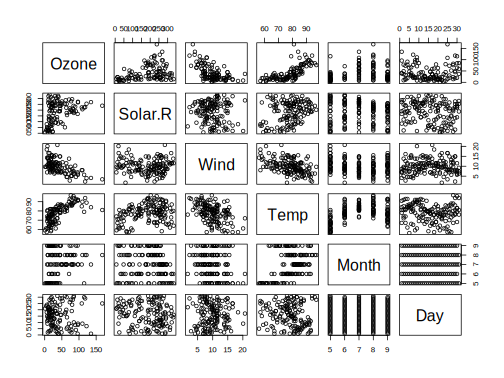

In [ ]:
pairs(airquality)

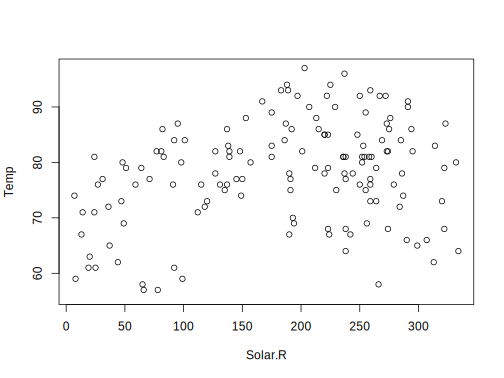

In [ ]:
plot(Temp ~ Solar.R, data = airquality)

In [ ]:
mod1 <- lm(Ozone ~ Wind + Temp, data = airquality)

In [ ]:
summary(mod1)


Call:
lm(formula = Ozone ~ Wind + Temp, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.251 -13.695  -2.856  11.390 100.367 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -71.0332    23.5780  -3.013   0.0032 ** 
Wind         -3.0555     0.6633  -4.607 1.08e-05 ***
Temp          1.8402     0.2500   7.362 3.15e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.85 on 113 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.5687,	Adjusted R-squared:  0.5611 
F-statistic:  74.5 on 2 and 113 DF,  p-value: < 2.2e-16



In [ ]:
mod2 <- lm(formula = Ozone ~ Solar.R + Wind + Temp, data = airquality)
summary(mod2)


Call:
lm(formula = Ozone ~ Solar.R + Wind + Temp, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.485 -14.219  -3.551  10.097  95.619 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   23.05472  -2.791  0.00623 ** 
Solar.R       0.05982    0.02319   2.580  0.01124 *  
Wind         -3.33359    0.65441  -5.094 1.52e-06 ***
Temp          1.65209    0.25353   6.516 2.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.18 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5948 
F-statistic: 54.83 on 3 and 107 DF,  p-value: < 2.2e-16



In [ ]:
mod3 <- lm(formula = Ozone ~ Solar.R + Wind + Temp + Wind:Temp, data = airquality)
summary(mod3)


Call:
lm(formula = Ozone ~ Solar.R + Wind + Temp + Wind:Temp, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.888 -11.938  -3.084   8.753  94.235 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -245.08368   46.84632  -5.232 8.53e-07 ***
Solar.R        0.06599    0.02152   3.067 0.002745 ** 
Wind          14.38471    4.13249   3.481 0.000727 ***
Temp           3.91373    0.57217   6.840 5.26e-10 ***
Wind:Temp     -0.22795    0.05259  -4.334 3.34e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.61 on 106 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6652,	Adjusted R-squared:  0.6526 
F-statistic: 52.66 on 4 and 106 DF,  p-value: < 2.2e-16



That 3rd linear model is starting to look pretty good. Let's take a look at the diagnostic plots available using the 'plot' method for lm objects:

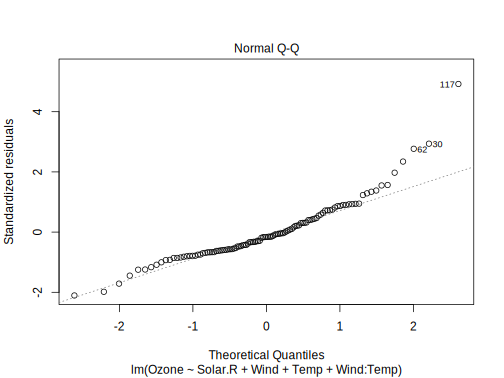

In [ ]:
plot(mod3, which = 2) # select 1:6 to choose which plot